# ANZ Customer Transaction Data Analysis

This analysis is based on a synthesised transaction dataset containing transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.
The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data.

In [128]:
# Load required libraries
import datetime
from datetime import date, timedelta
from IPython.display import Image
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
import  seaborn as sns

# figure size in inches
sns.set(rc={'figure.figsize':(25,5)})

In [129]:
df = pd.read_csv('ANZ_synthesised_transaction_dataset.csv')
display(df.head())

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [130]:
df.shape
print(f'The dataframe has a shape of {df.shape[0]} rows and {df.shape[1]} columns.')

The dataframe has a shape of 12043 rows and 23 columns.


In [131]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [133]:
df['date'] = pd.to_datetime(df['date'])
df['extraction'] = pd.to_datetime(df['extraction'])

In [134]:
display(df.describe())

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [135]:
df.groupby('txn_description')['merchant_id'].count()

txn_description
INTER BANK       0
PAY/SALARY       0
PAYMENT          0
PHONE BANK       0
POS           3783
SALES-POS     3934
Name: merchant_id, dtype: int64

For each record/row, information is complete for majority of columns. Some columns contain missing
data (blank or NA cells), which is likely due to the nature of transaction. (i.e. `merchants` are only involved in POS payments)

In [136]:
all_transactions = len(df)
all_transactions

12043

In [137]:
# concatenate customer id and account
df['customer_id_account'] = df['account'] + ' + ' +  df['customer_id']

print('========================================')
print('Customer ID')
print(df['customer_id'][:3])
print('========================================')
print('Customer Account')
print(df['account'][:3])
print('========================================')
print('Customer ID + Account')
print(df['customer_id_account'][:3])
print('========================================')

Customer ID
0    CUS-2487424745
1    CUS-2487424745
2    CUS-2142601169
Name: customer_id, dtype: object
Customer Account
0    ACC-1598451071
1    ACC-1598451071
2    ACC-1222300524
Name: account, dtype: object
Customer ID + Account
0    ACC-1598451071 + CUS-2487424745
1    ACC-1598451071 + CUS-2487424745
2    ACC-1222300524 + CUS-2142601169
Name: customer_id_account, dtype: object


In [138]:
customer_id_account = df['customer_id_account'].nunique()
customer_id = df['customer_id'].nunique()
bank_account = df['account'].nunique()

In [139]:
assert customer_id == bank_account
assert customer_id_account == bank_account
assert customer_id == customer_id_account

In [140]:
print(f" There are {customer_id} customer id's, {bank_account} bank accounts and {customer_id_account} customer id plus account combination. For each costumer id and account combination, there is a unique customer. This proves that each customer has a single bank account.")

 There are 100 customer id's, 100 bank accounts and 100 customer id plus account combination. For each costumer id and account combination, there is a unique customer. This proves that each customer has a single bank account.


In [141]:
start_date = min(df['date'])
end_date = df['date'].max()

print(f'Transactions range from {start_date} to {end_date}')

Transactions range from 2018-01-08 00:00:00 to 2018-12-10 00:00:00


In [142]:
# Number of days between start and end date
numdays = (end_date - start_date).days
numdays

336

In [143]:
dates_missing = pd.date_range(start = start_date, end = end_date ).difference(df.date)
dates_missing[:10]

DatetimeIndex(['2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
               '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-20'],
              dtype='datetime64[ns]', freq=None)

In [144]:
no_dates_missing = len(dates_missing)
no_dates_missing

246

In [145]:
missing_dates_pct = round((no_dates_missing/numdays * 100),2)
print(f'{missing_dates_pct}% of data for the dates between {start_date} and {end_date} is missing.')

73.21% of data for the dates between 2018-01-08 00:00:00 and 2018-12-10 00:00:00 is missing.


In [146]:
year_days = 365
trans_pct = 91 / year_days * 100
all_months = 12
months = trans_pct/ 100 * all_months
months
print(f'There are about {math.ceil(months)} worth months of transaction data in this dataset.')

There are about 3 worth months of transaction data in this dataset.


In [147]:
# derive day and hour data of each transaction
df['hour'] = df.extraction.dt.hour
df['day_of_week'] =df['extraction'].dt.strftime('%A')

In [148]:
df['day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [149]:
df['hour'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [150]:
df['merchant_long'] = df['merchant_long_lat'].str.split(' ', expand=True)[0].astype(float)
df['merchant_lat'] = df['merchant_long_lat'].str.split(' ', expand=True)[1].astype(float)

In [151]:
df['customer_long'] = df['long_lat'].str.split(' ', expand=True)[0].astype(float)
df['customer_lat'] = df['long_lat'].str.split(' ', expand=True)[1].astype(float)

image gotten from 
[National Location Information](https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/continental-extremities) 

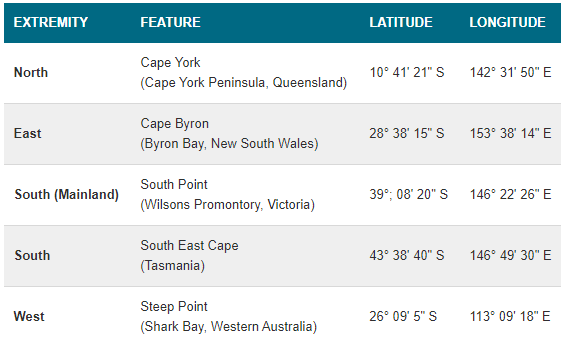

In [152]:
Image("australia_extremities.png")

In [153]:
# filtering out transactions for merchants who don't reside in Australia
merchant_outside = df[(~(df['merchant_lat'] > -44) & (df['merchant_lat'] <= -10) & (df['merchant_long'] >= 113) & (df['merchant_long'] < 154))]
merchant_outside

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,customer_id,merchant_long_lat,movement,customer_id_account,hour,day_of_week,merchant_long,merchant_lat,customer_long,customer_lat


All Merchants reside within Australia and all their transaction history occured inside Australia.

In [154]:
# filtering out transactions for customers who don't reside in Australia
customer_outside = df[(~(df['customer_lat'] > -44) & (df['customer_lat'] <= -10) & (df['customer_long'] >= 113) & (df['customer_long'] < 154))]
customer_outside

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,customer_id,merchant_long_lat,movement,customer_id_account,hour,day_of_week,merchant_long,merchant_lat,customer_long,customer_lat


Same applies to all Customers. The entirety of their transactions took place in Australia where they reside.

In [155]:
# filtering out purchase transactions only
# assuming purchase transactions must be associated with a merchant (have a merchant Id)
merchant = df[df['merchant_id'].notna()]
merchant.describe()

,card_present_flag,merchant_code,balance,age,amount,hour,merchant_long,merchant_lat,customer_long,customer_lat
count,7717.000000,0.0,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,0.802644,NaN,11871.056585,30.052093,40.153732,13.412207,143.433277,-32.752651,143.779001,-37.682413
std,0.398029,NaN,25999.398243,9.439454,149.833070,5.769436,12.090074,5.282423,16.901687,54.745625
min,0.000000,NaN,0.240000,18.000000,0.100000,0.000000,113.830000,-43.310000,114.620000,-573.000000
25%,1.000000,NaN,2723.890000,23.000000,12.080000,9.000000,144.680000,-37.710000,138.670000,-37.580000
50%,1.000000,NaN,5286.040000,27.000000,19.700000,14.000000,145.830000,-33.840000,145.730000,-33.780000
75%,1.000000,NaN,10278.290000,38.000000,33.910000,19.000000,151.210000,-29.440000,151.230000,-27.950000
max,1.000000,NaN,267093.660000,78.000000,7081.090000,23.000000,153.610000,-12.330000,255.000000,-12.370000


In [156]:
pos_transations = df[(df['txn_description'] == 'SALES-POS')|(df['txn_description'] == 'POS')]
pos_transations.describe()

,card_present_flag,merchant_code,balance,age,amount,hour,merchant_long,merchant_lat,customer_long,customer_lat
count,7717.000000,0.0,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,0.802644,NaN,11871.056585,30.052093,40.153732,13.412207,143.433277,-32.752651,143.779001,-37.682413
std,0.398029,NaN,25999.398243,9.439454,149.833070,5.769436,12.090074,5.282423,16.901687,54.745625
min,0.000000,NaN,0.240000,18.000000,0.100000,0.000000,113.830000,-43.310000,114.620000,-573.000000
25%,1.000000,NaN,2723.890000,23.000000,12.080000,9.000000,144.680000,-37.710000,138.670000,-37.580000
50%,1.000000,NaN,5286.040000,27.000000,19.700000,14.000000,145.830000,-33.840000,145.730000,-33.780000
75%,1.000000,NaN,10278.290000,38.000000,33.910000,19.000000,151.210000,-29.440000,151.230000,-27.950000
max,1.000000,NaN,267093.660000,78.000000,7081.090000,23.000000,153.610000,-12.330000,255.000000,-12.370000


In [157]:
# it turned out that is equivilent to excluding following categories of transactions
assert sorted(merchant) == sorted(pos_transations)

In [195]:
# customers average monthly transaction volume.
trans_vol = df.groupby('customer_id')['transaction_id'].count().sort_values(ascending=False)/3
trans_vol

customer_id
CUS-2487424745    192.666667
CUS-2142601169    101.000000
CUS-3026014945     97.333333
CUS-3378712515     86.666667
CUS-1614226872     86.333333
                     ...    
CUS-3395687666     13.333333
CUS-3201519139     12.333333
CUS-1646183815     11.333333
CUS-495599312      10.333333
CUS-1739931018      8.333333
Name: transaction_id, Length: 100, dtype: float64

In [191]:
fig = px.histogram(trans_vol, x="transaction_id", labels = {'transaction_id':'Monthly Transaction Volume'},
                                                     title="Histogram of Customers Monthly Transaction Volume")
fig.show()

In [186]:
# customers daily transaction volume.
trans_vol_wday = df.groupby('day_of_week')['transaction_id'].nunique().sort_values(ascending=False)
trans_vol_wday

day_of_week
Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: transaction_id, dtype: int64

Text(0, 0.5, 'Transcation Volume')

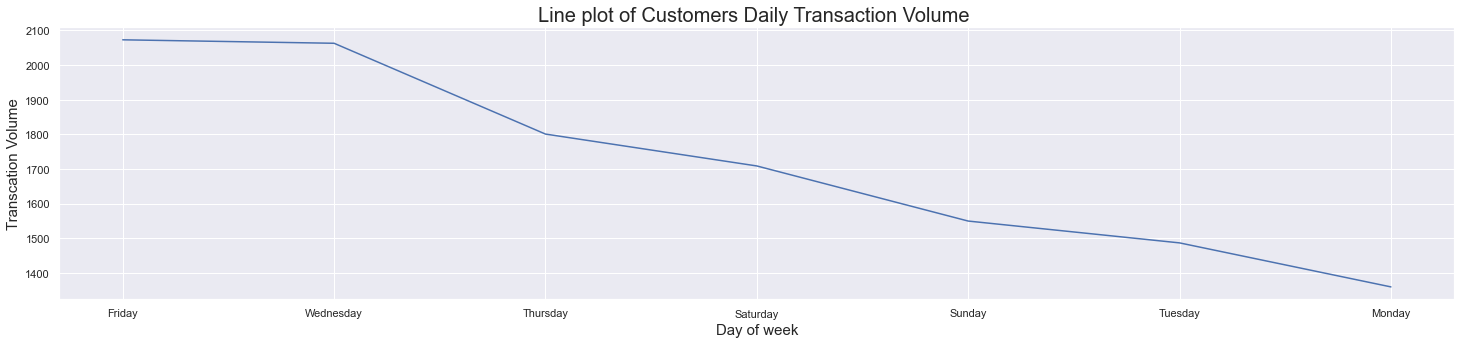

In [187]:
ax = sns.lineplot(data=trans_vol_wday)
plt.title('Line plot of Customers Daily Transaction Volume ', {'fontsize': 20})
plt.xlabel('Day of week', {'fontsize': 15})
plt.ylabel('Transcation Volume', {'fontsize': 15})

Friday have the highest transaction volume when compared to other week days closely followed by Wednesday.

In [175]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'customer_id_account', 'hour', 'day_of_week',
       'merchant_long', 'merchant_lat', 'customer_long', 'customer_lat'],
      dtype='object')

In [184]:
# customers daily transaction volume.
mercahant_vol_wday = df.groupby('day_of_week')['merchant_id'].nunique().sort_values(ascending=False)
mercahant_vol_wday

day_of_week
Friday       1241
Saturday     1228
Wednesday    1172
Sunday       1068
Thursday     1043
Tuesday       801
Monday        710
Name: merchant_id, dtype: int64

Text(0, 0.5, 'Transcation Volume')

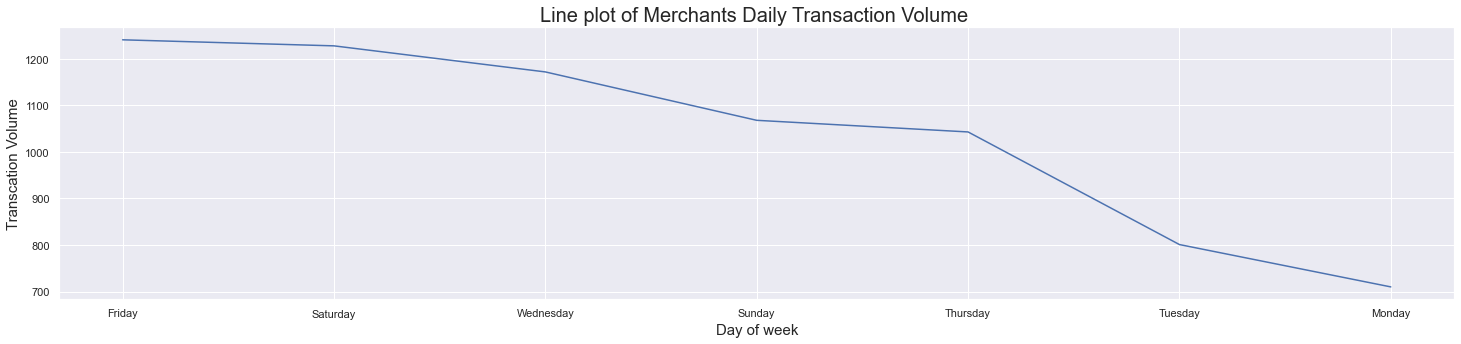

In [243]:
ax = sns.lineplot(data=mercahant_vol_wday)
plt.title('Line plot of Merchants Daily Transaction Volume ', {'fontsize': 20})
plt.xlabel('Day of week', {'fontsize': 15})
plt.ylabel('Transcation Volume', {'fontsize': 15})

For merchants, most of their transactions occur on Fridays and Saturdays.

In [183]:
df.groupby('gender')['customer_id'].nunique().sort_values(ascending=False)

gender
M    56
F    44
Name: customer_id, dtype: int64

Text(0, 0.5, 'Transcation Volume')

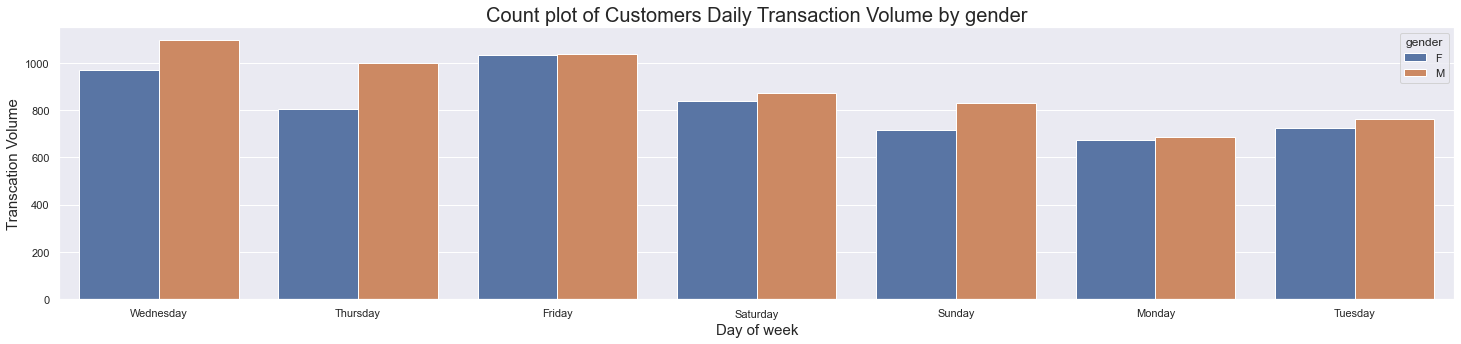

In [196]:
ax = sns.countplot(data=df, x='day_of_week', hue='gender' )
plt.title('Count plot of Customers Daily Transaction Volume by gender', {'fontsize': 20})
plt.xlabel('Day of week', {'fontsize': 15})
plt.ylabel('Transcation Volume', {'fontsize': 15})

In [200]:
# customers hourly transaction volume.
trans_vol_hour = df.groupby('hour')['transaction_id'].count().sort_values(ascending=False)
trans_vol_hour[:5]

hour
9     1106
11     941
17     815
14     757
21     741
Name: transaction_id, dtype: int64

Text(0, 0.5, 'Transcation Volume')

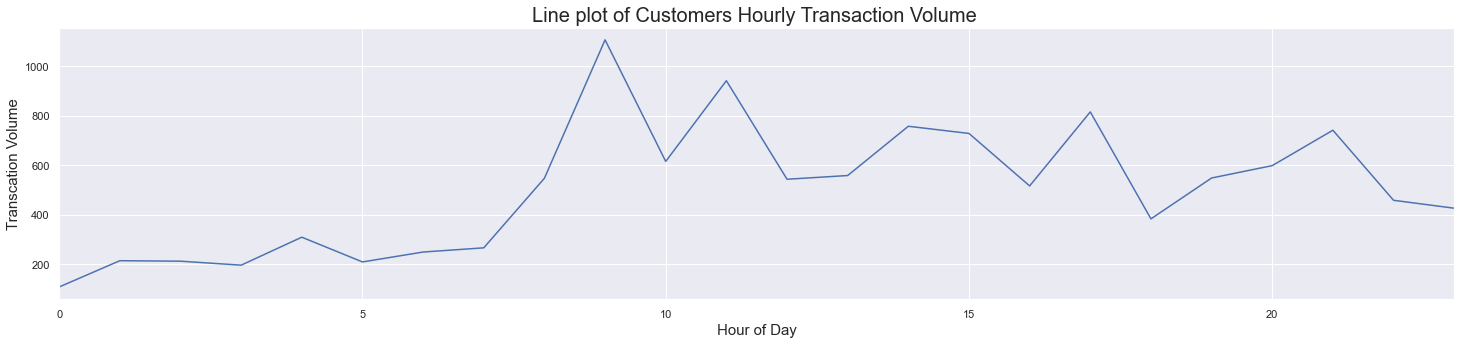

In [201]:
ax = sns.lineplot(data=trans_vol_hour, size_order=5)
ax.set_xlim(0,23)
plt.title('Line plot of Customers Hourly Transaction Volume ', {'fontsize': 20})
plt.xlabel('Hour of Day', {'fontsize': 15})
plt.ylabel('Transcation Volume', {'fontsize': 15})

Most transactions take place around 9am followed by 11am. Other than that,the bulk of transactions occur at afternoons and evenings. The least amount of transactions are late at night / very early in the morning which makes sense.

In [202]:
df.groupby('age')['customer_id'].count().sort_values(ascending=False)[:10]

age
26    893
38    767
20    765
21    733
24    732
40    704
19    693
34    537
25    515
30    499
Name: customer_id, dtype: int64

In [284]:
df['X_diff'] = df['customer_long'] - df['merchant_long']
df['Y_diff'] = df['customer_lat'] - df['merchant_lat']
df['distance'] = np.linalg.norm(df[['X_diff', 'Y_diff']], axis=1)

In [296]:
df.groupby('gender')['distance'].mean().sort_values(ascending=False)

gender
M    15.590081
F     4.966735
Name: distance, dtype: float64

In [225]:
def age_group(age):
    if (age > 17) and (age < 36):
        return 'Young Adult'
    elif (age > 35 ) and  (age < 56):
        return  'Mid-Aged Adult'
    elif (age > 55 ) and (age < 79):
        return  'Old-Aged Adult'
    else:
        return 'Null'

In [226]:
df['age_category'] = df.age.map(age_group)

In [295]:
df.groupby('age_category')['distance'].mean().sort_values(ascending=False)

age_category
Young Adult       13.091241
Old-Aged Adult     3.744824
Mid-Aged Adult     3.239491
Name: distance, dtype: float64

In [229]:
df.groupby('age_category')['age'].mean().sort_values(ascending=False)

age_category
Old-Aged Adult    68.401786
Mid-Aged Adult    41.151742
Young Adult       25.169063
Name: age, dtype: float64

Text(0, 0.5, 'Age Category')

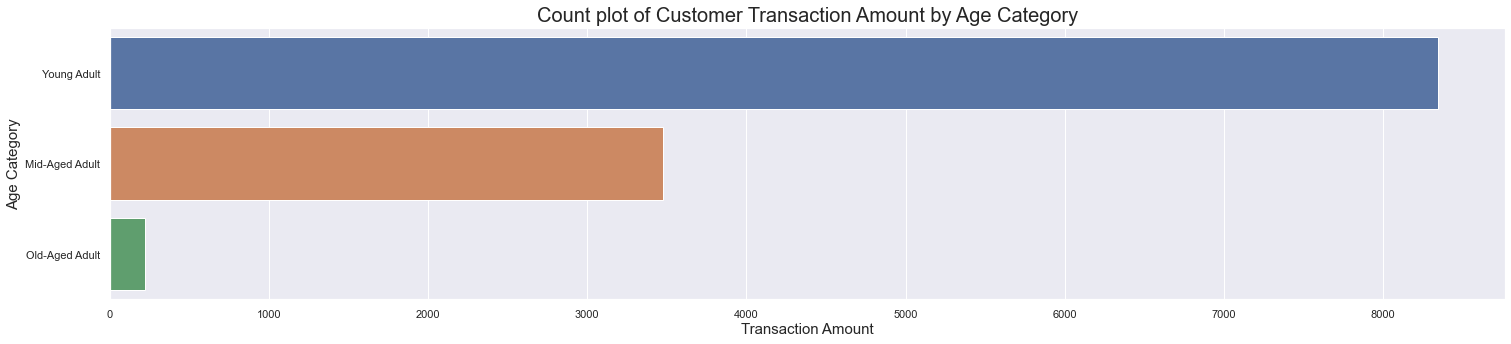

In [242]:
ax = sns.countplot(data=df, y='age_category')
plt.title('Count plot of Customer Transaction Amount by Age Category', {'fontsize': 20})
plt.xlabel('Transaction Amount', {'fontsize': 15})
plt.ylabel('Age Category', {'fontsize': 15})

In [245]:
age_cat_grp = df.groupby('age_category')['amount'].sum().sort_values(ascending=False)
age_cat_grp

age_category
Young Adult       1481427.24
Mid-Aged Adult     741744.07
Old-Aged Adult      40112.89
Name: amount, dtype: float64

In [263]:
young_amount = age_cat_grp[0]
mid_amount = age_cat_grp[1]
old_amount = age_cat_grp[1]
total_amount = df['amount'].sum()

In [271]:
young_amount_pct = young_amount/total_amount * 100
print(f'{round(young_amount_pct,2)}% of the amount spent by all customers were by young adults with the other two age categories accounting for the rest i.e {100 - (round(young_amount_pct,2))}%')

65.45% of the amount spent by all customers were by young adults with the other two age categories accounting for the rest i.e 34.55%


In [253]:
merchant['age_category'] = merchant.age.map(age_group)

C:\Users\SOLA\AppData\Local\Temp/ipykernel_8372/3030297699.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
merchant_age_cat_grp = merchant.groupby('age_category')['amount'].sum().sort_values(ascending=False)
merchant_age_cat_grp

age_category
Young Adult       211335.83
Mid-Aged Adult     94499.35
Old-Aged Adult      4031.17
Name: amount, dtype: float64

In [265]:
merchant_young_amount = merchant_age_cat_grp[0]
merchant_mid_amount = merchant_age_cat_grp[1]
merchant_old_amount = merchant_age_cat_grp[1]
merchant_amount = merchant['amount'].sum()

In [277]:
merchant_young_amount_pct = merchant_young_amount/merchant_amount * 100
print(f'{round(merchant_young_amount_pct,2)}% of the amount spent by merchant customers were by young adults with the other two age categories accounting for the rest i.e {round((100 - merchant_young_amount_pct),2)}%')

68.2% of the amount spent by merchant customers were by young adults with the other two age categories accounting for the rest i.e 31.8%


Text(0, 0.5, 'Age Category')

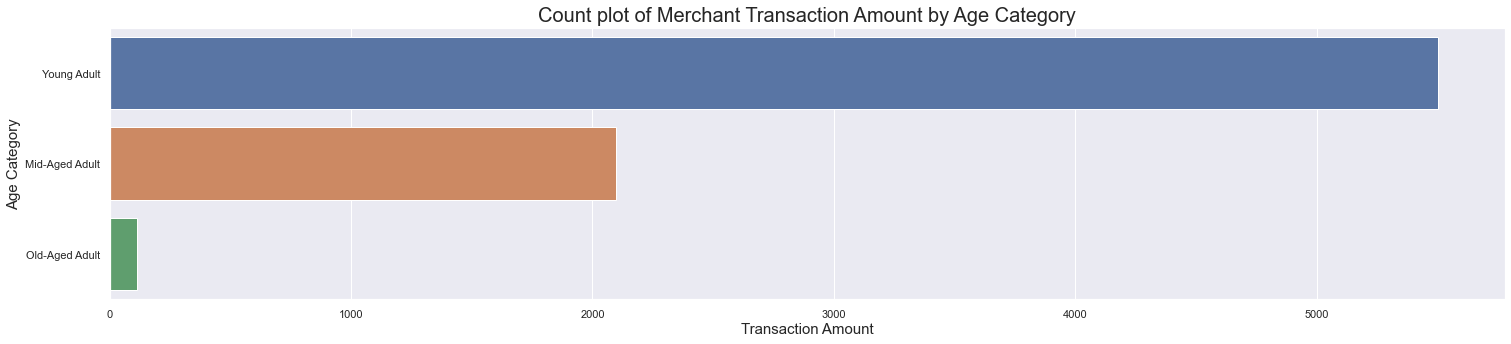

In [260]:
ax = sns.countplot(data=merchant, y='age_category')
plt.title('Count plot of Merchant Transaction Amount by Age Category', {'fontsize': 20})
plt.xlabel('Transaction Amount', {'fontsize': 15})
plt.ylabel('Age Category', {'fontsize': 15})

In [258]:
# customers transaction volume by age category.
age_vol = df.groupby('age_category')['transaction_id'].count().sort_values(ascending=False)
age_vol

age_category
Young Adult       8346
Mid-Aged Adult    3473
Old-Aged Adult     224
Name: transaction_id, dtype: int64

In [259]:
# Merchant transaction volume by age category.
merchant_age_vol = merchant.groupby('age_category')['transaction_id'].count().sort_values(ascending=False)
merchant_age_vol

age_category
Young Adult       5504
Mid-Aged Adult    2098
Old-Aged Adult     115
Name: transaction_id, dtype: int64

The same trend applies to customer and merchant transaction volume which is expected especially when compared to transaction amount. Young adults have the highest volume followed by mid aged adults. Old aged adults have the least transaction volume.